In [1]:
from sem import *
from models import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npp
import pandas as pd

In [2]:
dim = 10
n = 1000
env = 3
np.set_printoptions(suppress=True)

In [3]:
def make_env(sem, n):
    environments = [sem(n, .2),
                  sem(n, 2),
                sem(n, 5)]
    return environments

In [4]:
def run_methods(environments, sem, scram=True):
    att = dim/2 
    ls2 = LS2(environments, {})
    irm = IRM(environments, {})
    naive= naive_estimater(environments, {})
    icp = ICP(environments, {})
    
    e1= abs(ls2.att() - att).item()
    e2= abs(irm.att() - att).item()
    e3 = abs(naive.ate() - att).item()
    e4 = abs(icp.att() - att).item()
    return e1, e2, e3, e4
    

In [5]:
def calculate_err(setup, s, h,ls={}):
    err1, err2, err3, err4 = [], [], [],[]
    for i in range(10):
        sem = ChainEquationModel(dim, scramble=s,  hetero=h)
        sem.setup = setup
        envs = make_env(sem, n) 
        e1, e2, e3,e4= run_methods(envs, sem)
        err1.append(e1)
        err2.append(e2)
        err3.append(e3)
        err4.append(e4)
    print("*************************")
    print("setting: {}, scramble: {}, hetero: {},".format(setup, s, h))
    print("erm err: {}, irm err: {}, naive err: {}, icp err:{}".format(
        np.mean(err1),np.mean(err2), np.mean(err3), np.mean(err4)))
    print("erm std: {}, irm std: {}, naive std: {}".format(np.std(err1),np.std(err2), np.std(err3), np.std(err4)))
    
    ls['ls2']= [np.mean(err1), np.std(err1)]
    ls['irm']= [np.mean(err2), np.std(err2)]
    ls['naive']= [np.mean(err3),  np.std(err3)] 
    ls['icp']=[np.mean(err4),np.std(err4)]


    return ls
    

In [6]:
path = '../../res/exp1/'
for setup in ['dag','des', 'collider']:
    for s in [True, False]:
        for h in [True, False]:
            p = path +'{}_scramble_{}_hetero_{}.csv'.format(setup, s, h)
            err = calculate_err(setup, s, h)
            df = pd.DataFrame(err)
            df.to_csv(p,  sep=',',index=False)

*************************
setting: dag, scramble: True, hetero: True,
erm err: 0.09694485664367676, irm err: 0.11011505126953125, naive err: 2.552780878543854, icp err:2.593391513824463
erm std: 0.07466714479002888, irm std: 0.0857660183821745, naive std: 0.2819630608034446
*************************
setting: dag, scramble: True, hetero: False,
erm err: 0.10093879699707031, irm err: 0.18147311210632325, naive err: 2.5856990098953245, icp err:4.508951473236084
erm std: 0.06555075125630747, irm std: 0.06923358730781909, naive std: 0.23828970072369554
*************************
setting: dag, scramble: False, hetero: True,
erm err: 0.09034428596496583, irm err: 0.17059097290039063, naive err: 2.6113956451416014, icp err:1.0879064559936524
erm std: 0.08939151675965688, irm std: 0.12167063273731815, naive std: 0.10661802983584479
*************************
setting: dag, scramble: False, hetero: False,
erm err: 0.0797534465789795, irm err: 0.19634952545166015, naive err: 2.3895841360092165, icp 

In [7]:
res = pd.read_csv("{}collider_scramble_False_hetero_False.csv".format(path))

In [9]:
res

,ls2,irm,naive,icp
0,0.960164,0.302465,2.74957,5.0
1,0.000000,0.000000,0.00000,0.0


In [8]:
#plotting 
def make_plots( s, h):
    barWidth = 0.2
    # set height of bar
    bar1, bar2,bar3, bar4 = [],[],[],[]
    std1, std2,std3, std4 = [],[],[],[]
    for setup in ['dag','des', 'collider']:
        res =  pd.read_csv("../../res/exp1/{}_scramble_{}_hetero_{}.csv".format(setup, s, h))
        bar1.append(res['ls2'][0])
        bar2.append(res['irm'][0])
        bar3.append(res['naive'][0])
        bar4.append(res['icp'][0])
        
        std1.append(res['ls2'][1]/3.3)
        std2.append(res['irm'][1]/3.3)
        std3.append(res['naive'][1]/3.3)
        std4.append(res['icp'][1]/3.3)
        
    # Set position of bar on X axis
    r1 = np.arange(len(bar1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    sns.set(style="white")
    sns.set_palette('Set2')
    sns.set_context('paper')
    # Make the plot
    plt.bar(r1, bar2,  width=barWidth, edgecolor='white',yerr=std2, label='NICE')
    plt.bar(r2, bar1,  width=barWidth, edgecolor='white', yerr=std1, label='OLS-2')
    plt.bar(r3, bar3,  width=barWidth, edgecolor='white',yerr=std3, label='Unadjusted')
    plt.bar(r4, bar4, width=barWidth, edgecolor='white', yerr=std4,label='ICP')

    # Add xticks on the middle of the group bars
    # plt.xlabel('data generating processes')
    plt.xlim(-0.4, 2.9)
    plt.ylim(0, np.max(bar4)+np.max(std4))
    plt.ylabel('MAE and standard error',fontsize='large')
    plt.xticks([r + barWidth for r in range(len(bar1))], ['Noise', 'Descendant', 'Collider'],fontsize='large')

    # Create legend & Show graphic
    plt.legend(loc='upper left', fontsize='large',frameon=False)
    plt.tight_layout()
    # plt.show()

    plt.savefig('../../fig/scramble-{}-hetero-{}'.format(s, h),dpi=300, forma='pdf')

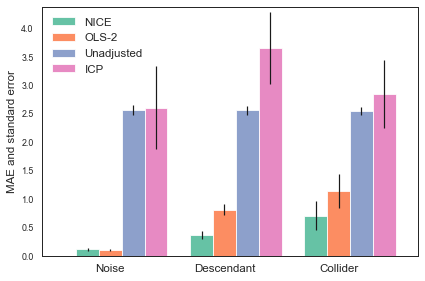

In [9]:
make_plots(True, True)

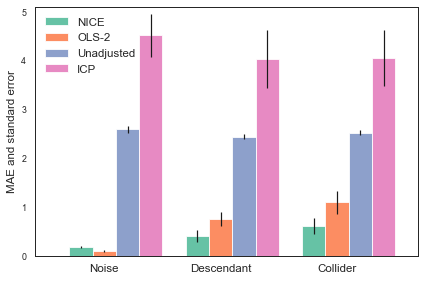

In [10]:
make_plots(True, False)

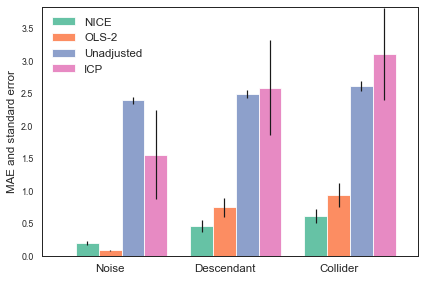

In [11]:
make_plots(False, False)

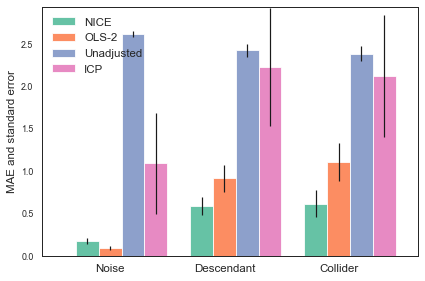

In [12]:
make_plots(False, True)